# ARIMA & Seasonal ARIMA Model

In [35]:
#import required Libaries

import numpy as np
import pandas as pd

# Visualization Libaries
import matplotlib.pyplot as plt
import seaborn as sns

#import magic function
%matplotlib inline

In [36]:
df = pd.read_csv('E:\A.I course\Datasets\Champagne Sales - Time Series Data\perrin-freres-monthly-champagne-.csv')

In [37]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [38]:
# Number of rows and columns
df.shape

(107, 2)

In [39]:
# Checking for missing values
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [40]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [41]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [42]:
# Drop the 106th row
df.drop(106,axis=0,inplace=True)

In [43]:
#drop the 105th row
df.drop(105,axis=0,inplace=True)

In [44]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


###### We can see that the two rows with missing values have been dropped

In [45]:
# Convert the month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [46]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [47]:
df.set_index('Month',inplace=True)

In [48]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [50]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the Data 

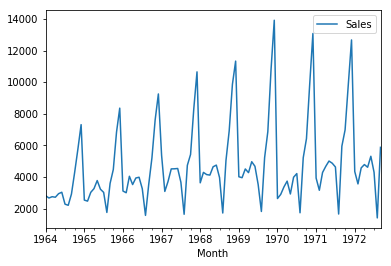

In [66]:
df.plot()

In [67]:
# Testing for stationarity using dickey-fuller test

from statsmodels.tsa.stattools import adfuller

In [68]:
test_result=adfuller(df['Sales'])

In [69]:
#Ho = It is non Stationary
#H1 = It is Stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [70]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing 

### This is method to handle Stationarity

In [71]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [72]:
df['Sales'].shift(1)

Month
1964-01-01        NaN
1964-02-01     2815.0
1964-03-01     2672.0
1964-04-01     2755.0
1964-05-01     2721.0
1964-06-01     2946.0
1964-07-01     3036.0
1964-08-01     2282.0
1964-09-01     2212.0
1964-10-01     2922.0
1964-11-01     4301.0
1964-12-01     5764.0
1965-01-01     7312.0
1965-02-01     2541.0
1965-03-01     2475.0
1965-04-01     3031.0
1965-05-01     3266.0
1965-06-01     3776.0
1965-07-01     3230.0
1965-08-01     3028.0
1965-09-01     1759.0
1965-10-01     3595.0
1965-11-01     4474.0
1965-12-01     6838.0
1966-01-01     8357.0
1966-02-01     3113.0
1966-03-01     3006.0
1966-04-01     4047.0
1966-05-01     3523.0
1966-06-01     3937.0
               ...   
1970-04-01     3370.0
1970-05-01     3740.0
1970-06-01     2927.0
1970-07-01     3986.0
1970-08-01     4217.0
1970-09-01     1738.0
1970-10-01     5221.0
1970-11-01     6424.0
1970-12-01     9842.0
1971-01-01    13076.0
1971-02-01     3934.0
1971-03-01     3162.0
1971-04-01     4286.0
1971-05-01     4676.0
1971

In [73]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [75]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [76]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


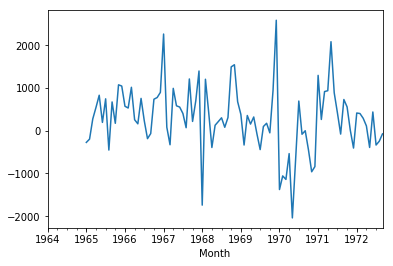

In [77]:
df['Seasonal First Difference'].plot()

# Auto Regression Model

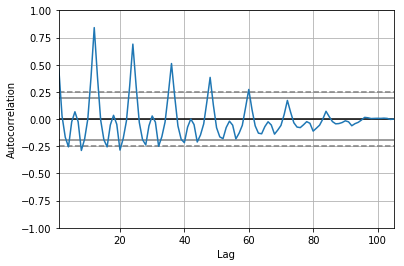

In [82]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [86]:
import statsmodels.api as sm

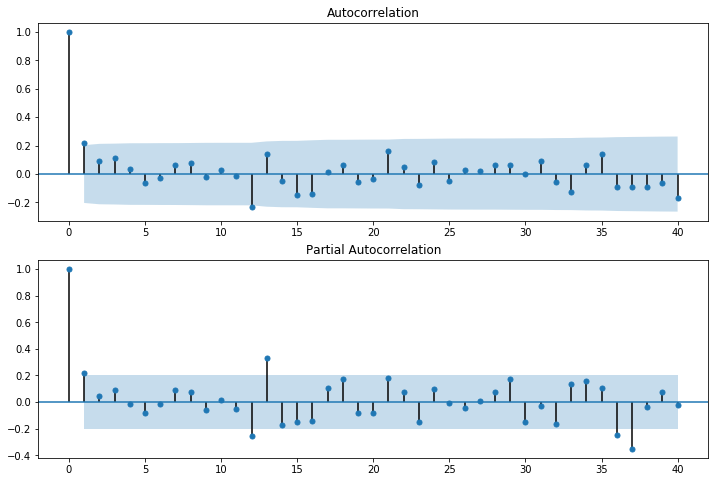

In [97]:
# Pass the Seasonal First Difference Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [88]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [89]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [90]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 18 Apr 2020   AIC                           1910.251
Time:                        22:10:37   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7854     12.405      1.837      0.069      -1.528      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

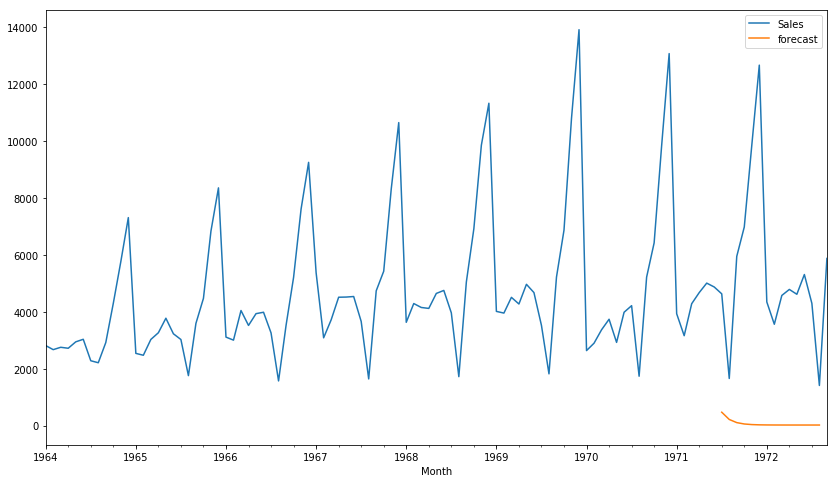

In [98]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(14,8))

# The above graph shows that ARIMA does not work well with Seasonal data,

# Hence we can use Seasonal Arima


In [95]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


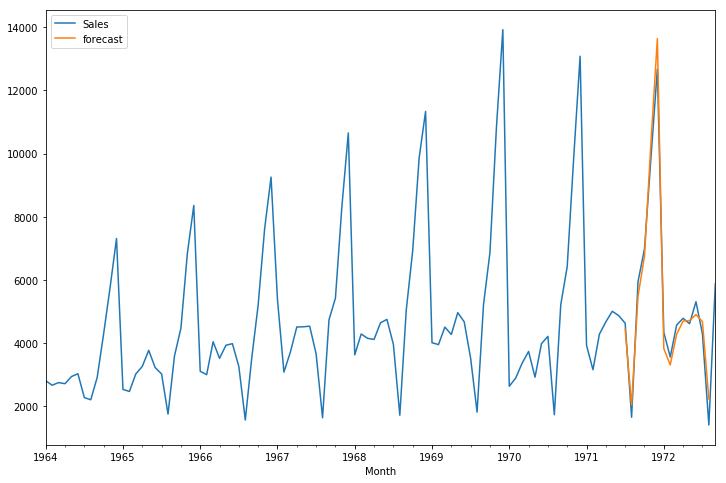

In [96]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [99]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [100]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [101]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [102]:
future_df=pd.concat([df,future_datest_df])

C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


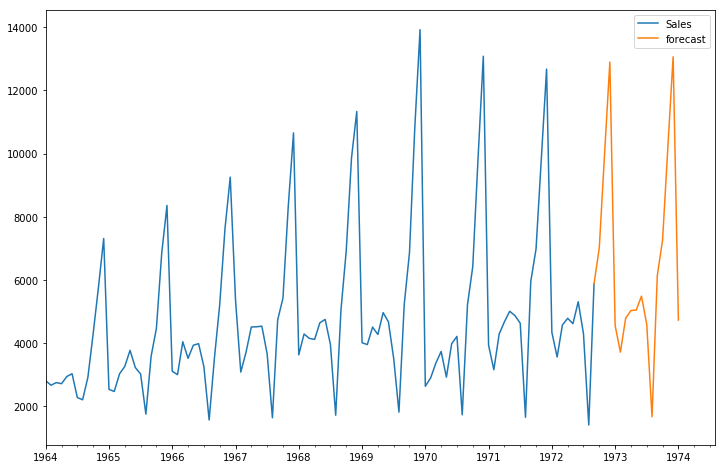

In [103]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))